# Visión por Computadora I #

## CEIA 21Co2025 ##

## TP1 - Parte 1 ##


José Aviani (jose.aviani@gmail.com)

José Luis Diaz (diazjoseluis@gmail.com)

Ricardo Silvera (rsilvera@thalu.com.ar)


---

### Importar lo necesario

In [ ]:
%pip install cv
%pip install numpy
%pip install matplotlib

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Funciones auxiliares

In [27]:
def _mostrar_histograma(ax, img, title):
    """
    Grafíca histogramas de la imagen `img` en sub-plot `ax`
    """

    colores = ('b', 'g', 'r')
    ax.set_title(title)

    for i, color in enumerate(colores):
        # Calcula el histograma para el canal de color actual
        hist = img[:, :, i].ravel()
        ax.hist(hist, bins=256, range=[0, 256], color=color, alpha=0.5, label=f'Canal {color.upper()}')

    ax.set_xlabel('Valor de Píxel')
    ax.set_ylabel('Frecuencia')
    ax.legend()


In [105]:
def procesarMuestra(file, percentiles=[100]):
    # Esta funcion lee imagen desde el path especificado y muesta:
    # - una fila con la imagen en cuestión y al lado un histograma de los canales RGB de la imagen.
    # - una fila por percentil con la imagen aplicada white patch (utilizando el percentil indicado) y al lado el histograma de la imagen.

    img_antes = cv.imread(file, cv.IMREAD_COLOR_RGB)

    filas = 1 + len(percentiles)
    fig, axs = plt.subplots(filas, 2, figsize=(14, filas*5))

    axs[0, 0].imshow(img_antes)
    axs[0, 0].set_title('Imagen original')
    axs[0, 0].axis('off')

    _mostrar_histograma(axs[0, 1], img_antes, f'Histograma: Imagen original')

    i = 1
    for percentil in percentiles:
        img_despues = white_patch(img_antes, percentil)

        axs[i, 0].imshow(img_despues)
        axs[i, 0].set_title(f'Imagen: whitepatch p{percentil}')
        axs[i, 0].axis('off')

        _mostrar_histograma(axs[i, 1], img_despues, f'Histograma: imagen whitepatch p{percentil}')
        i = i + 1

    plt.tight_layout()
    plt.show()


### Algoritmo White Patch

El algoritmo White Patch ajusta el balance de blancos de una imagen asumiendo que existe un píxel blanco puro (o casi blanco) en la escena original. Para ello, busca el valor máximo en cada canal (B, G, R) y escala todos los valores de ese canal de modo que el máximo alcance 255.


In [73]:
def white_patch(img, percentil=100):
    """Aplica el algoritmo White Patch para corrección de balance de blancos en una imagen a color (BGR)."""
    perc_vals = np.percentile(img.reshape(-1, 3), percentil, axis=0)
    print(perc_vals)
    img_corr = img / perc_vals * 255.0
    img_corr = np.clip(img_corr, 0, 255).astype(np.uint8)
    return img_corr

### Pruebas


#### Primer conjunto de pruebas: Manos

A continuación se procesarán un conjunto de imagenes utilizando función `procesarMuestra`, utilizando el percentil=100

[247. 157. 175.]


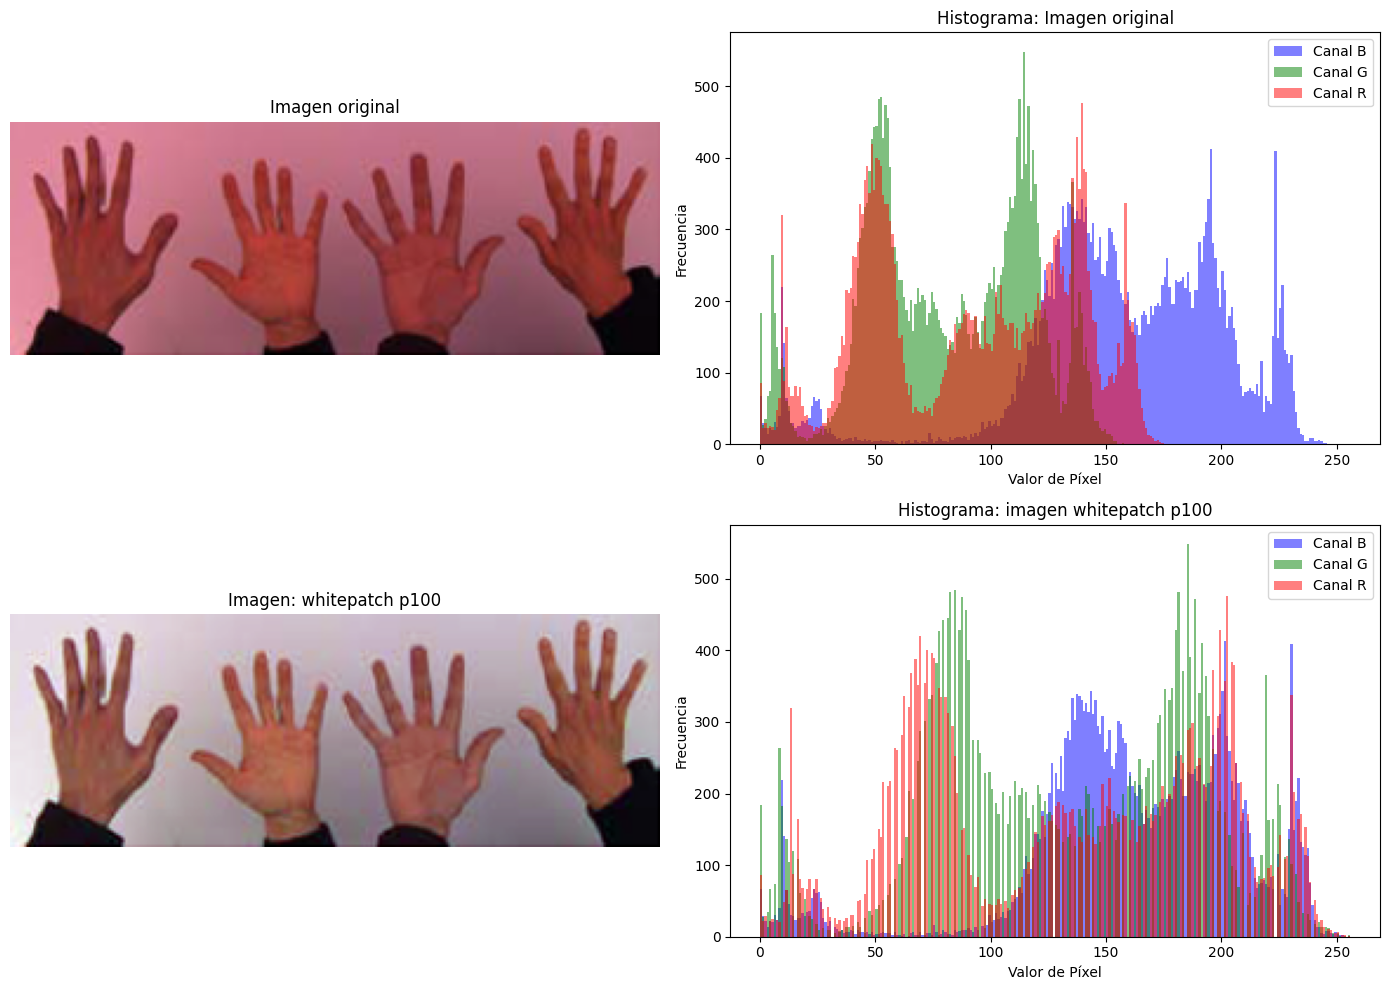

In [106]:
procesarMuestra('white_patch/test_red.png')

[210. 250. 171.]


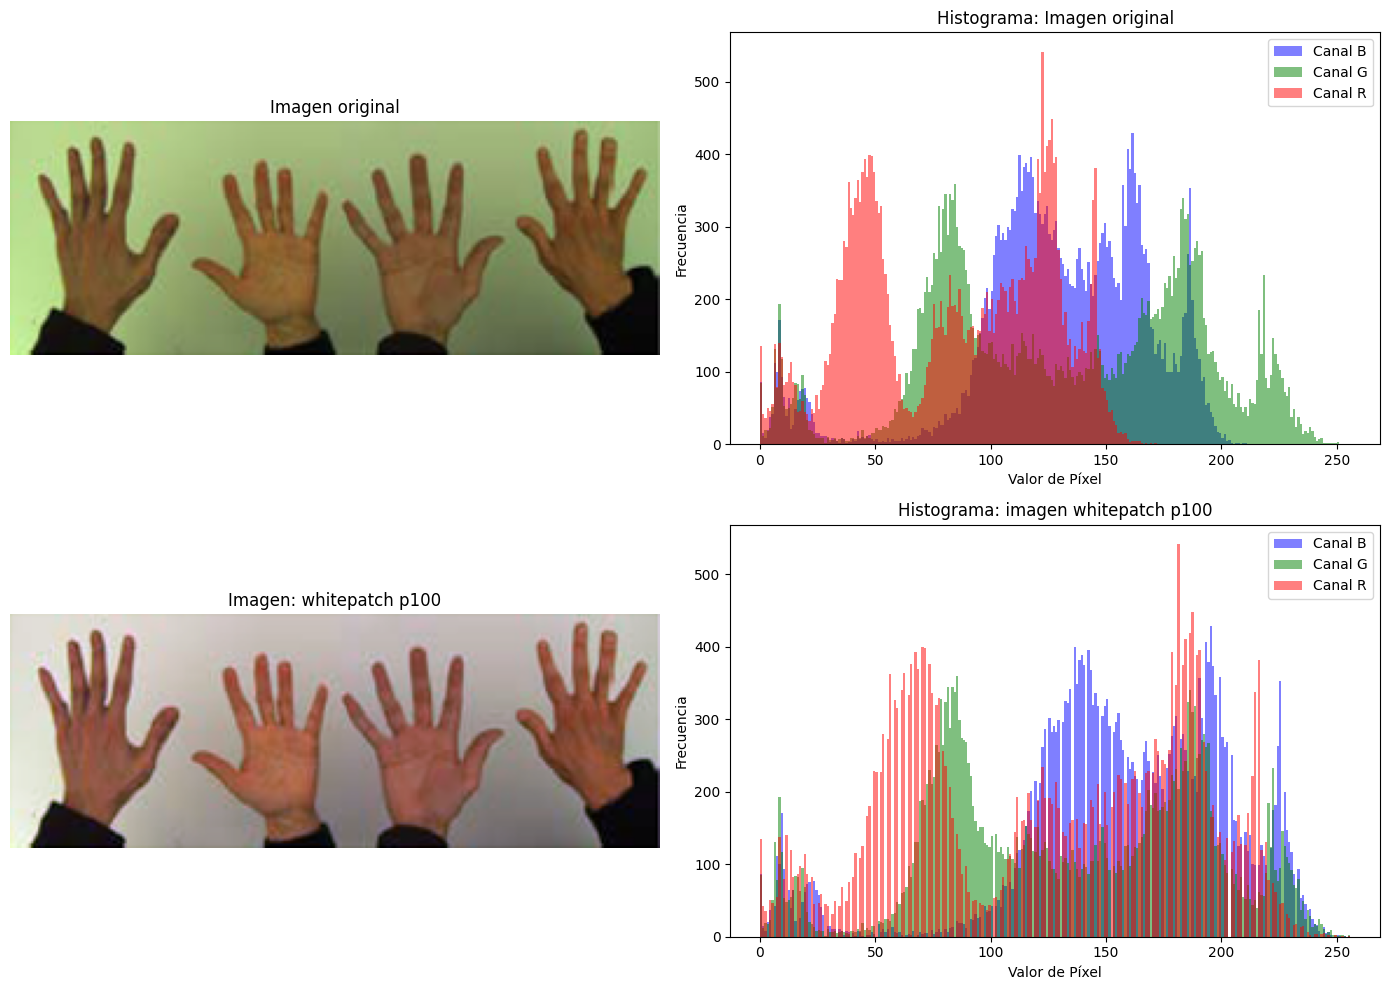

In [100]:
procesarMuestra('white_patch/test_green.png')

[165. 138. 200.]


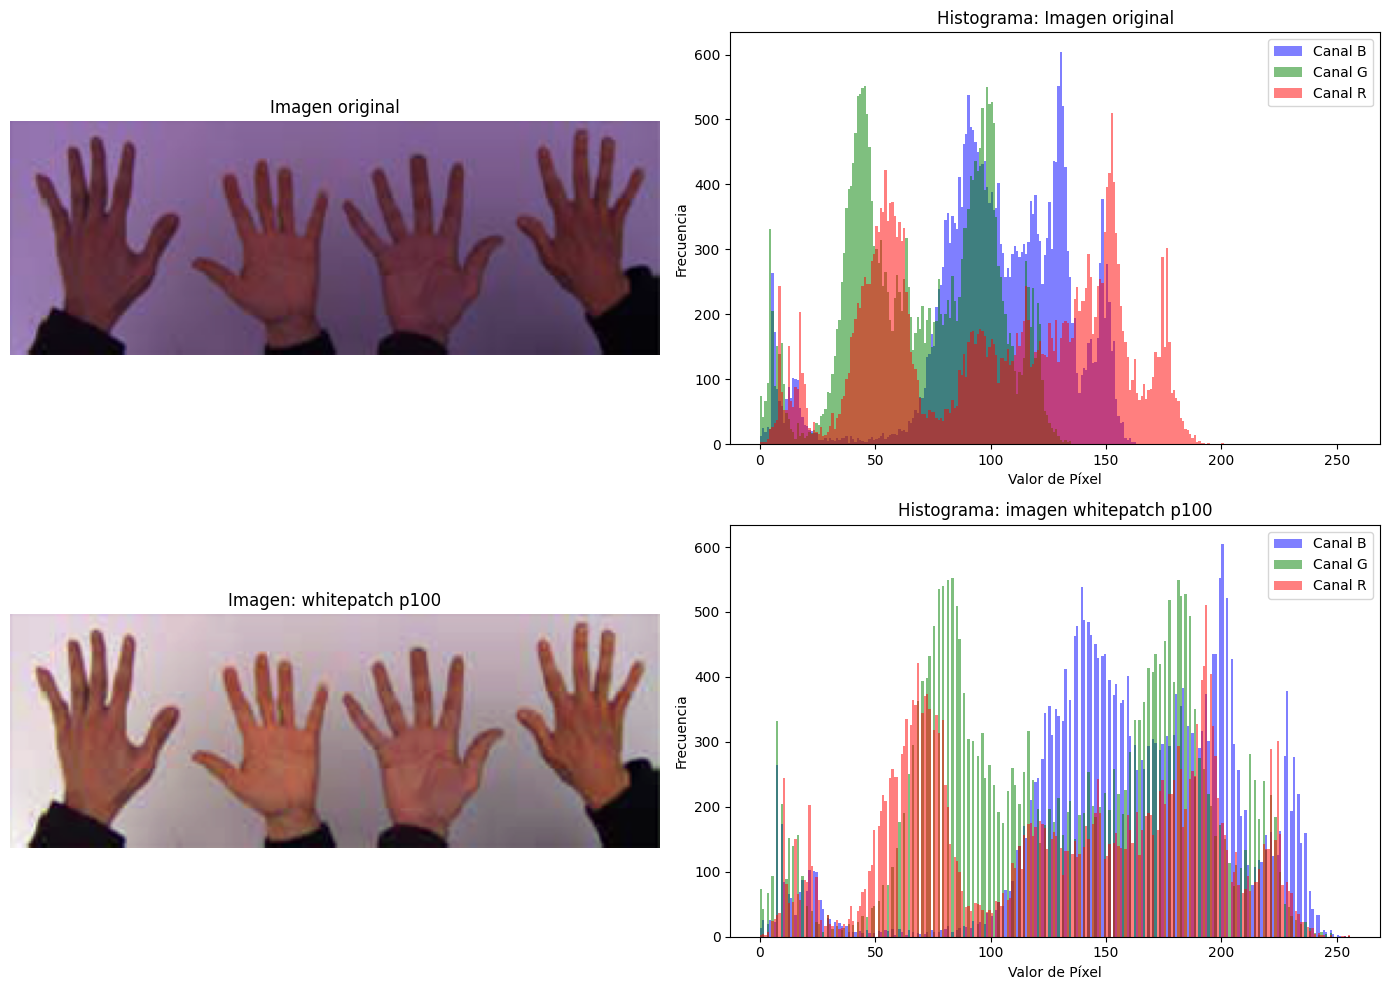

In [101]:
procesarMuestra('white_patch/test_blue.png')

En las imágenes anteriores, el resultado es bueno, ya que los valores en los píxeles de los canales no predominantes tienen máximos por debajo de 200 y se concentran en la zona de tonos medios. Al escalarlos, se logra compensar el color predominante en la imagen original y se observa un desplazamiento casi homogéneo hacia la derecha en los canales no predominantes.


#### Segundo conjunto de pruebas: depredador

A continuación un nuevo conjunto de imagenes. En este caso utilizando diferentes percentiles.


[126. 252. 155.]
[ 87. 242. 118.]
[ 80. 237. 113.]


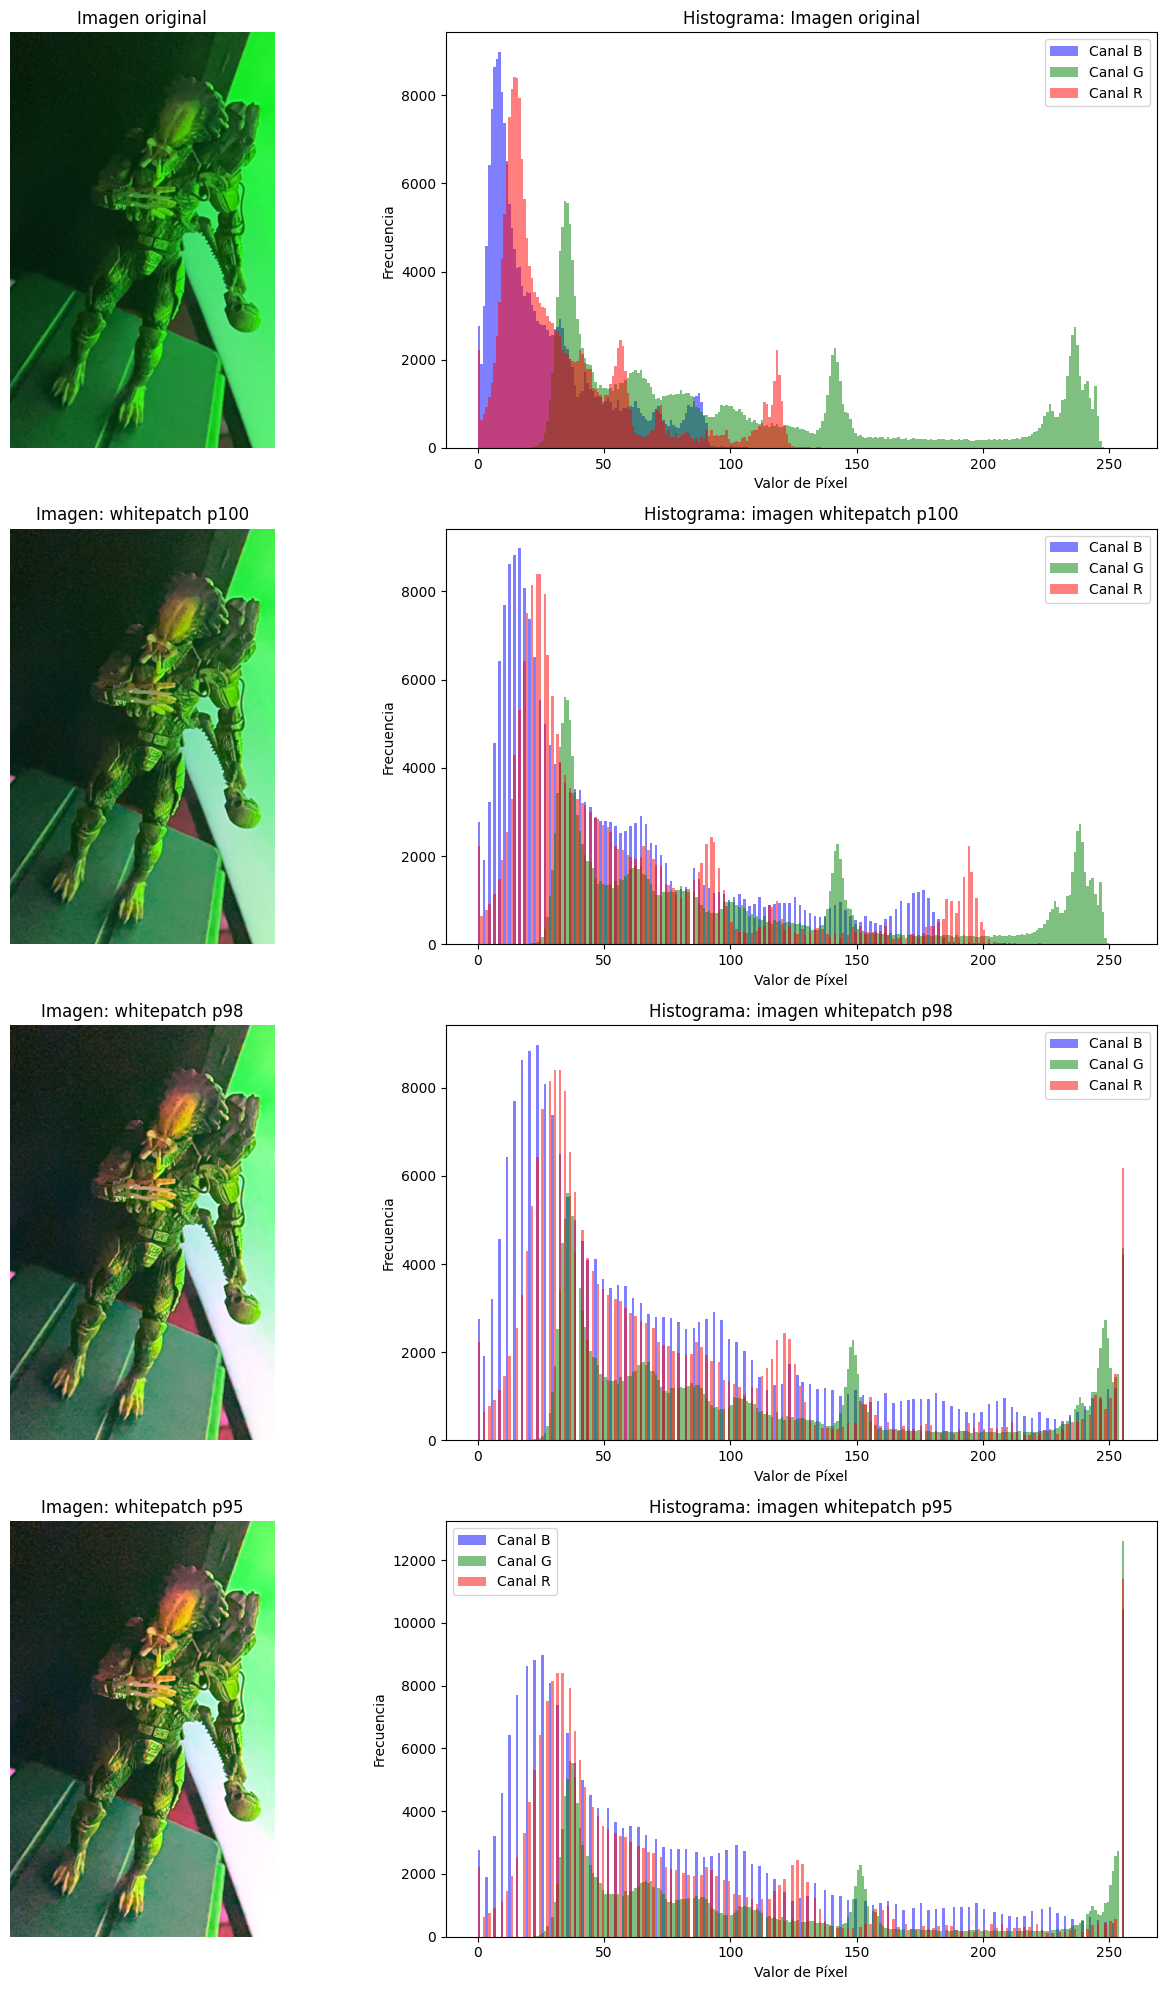

In [115]:
procesarMuestra('white_patch/wp_green.png', [100, 98, 95])


En la imagen anterior, se observa en los histogramas que los valores se concentran principalmente en la zona de sombras, por debajo de 100. Debido a este desequilibrio, los valores máximos se encuentran alejados de la media, lo que dificulta una adecuada compensación en los canales. Asimismo, el canal verde presenta una distribución no tan comprimida. Por ello, se opta por utilizar varios percentiles para excluir los valores atípicos y facilitar un mayor desplazamiento en la escala de valores. Podemos ver que tenemos muy buenos resultados con el percentil 98.

[255. 134. 122.]
[255.  66.  99.]
[255.  58.  90.]


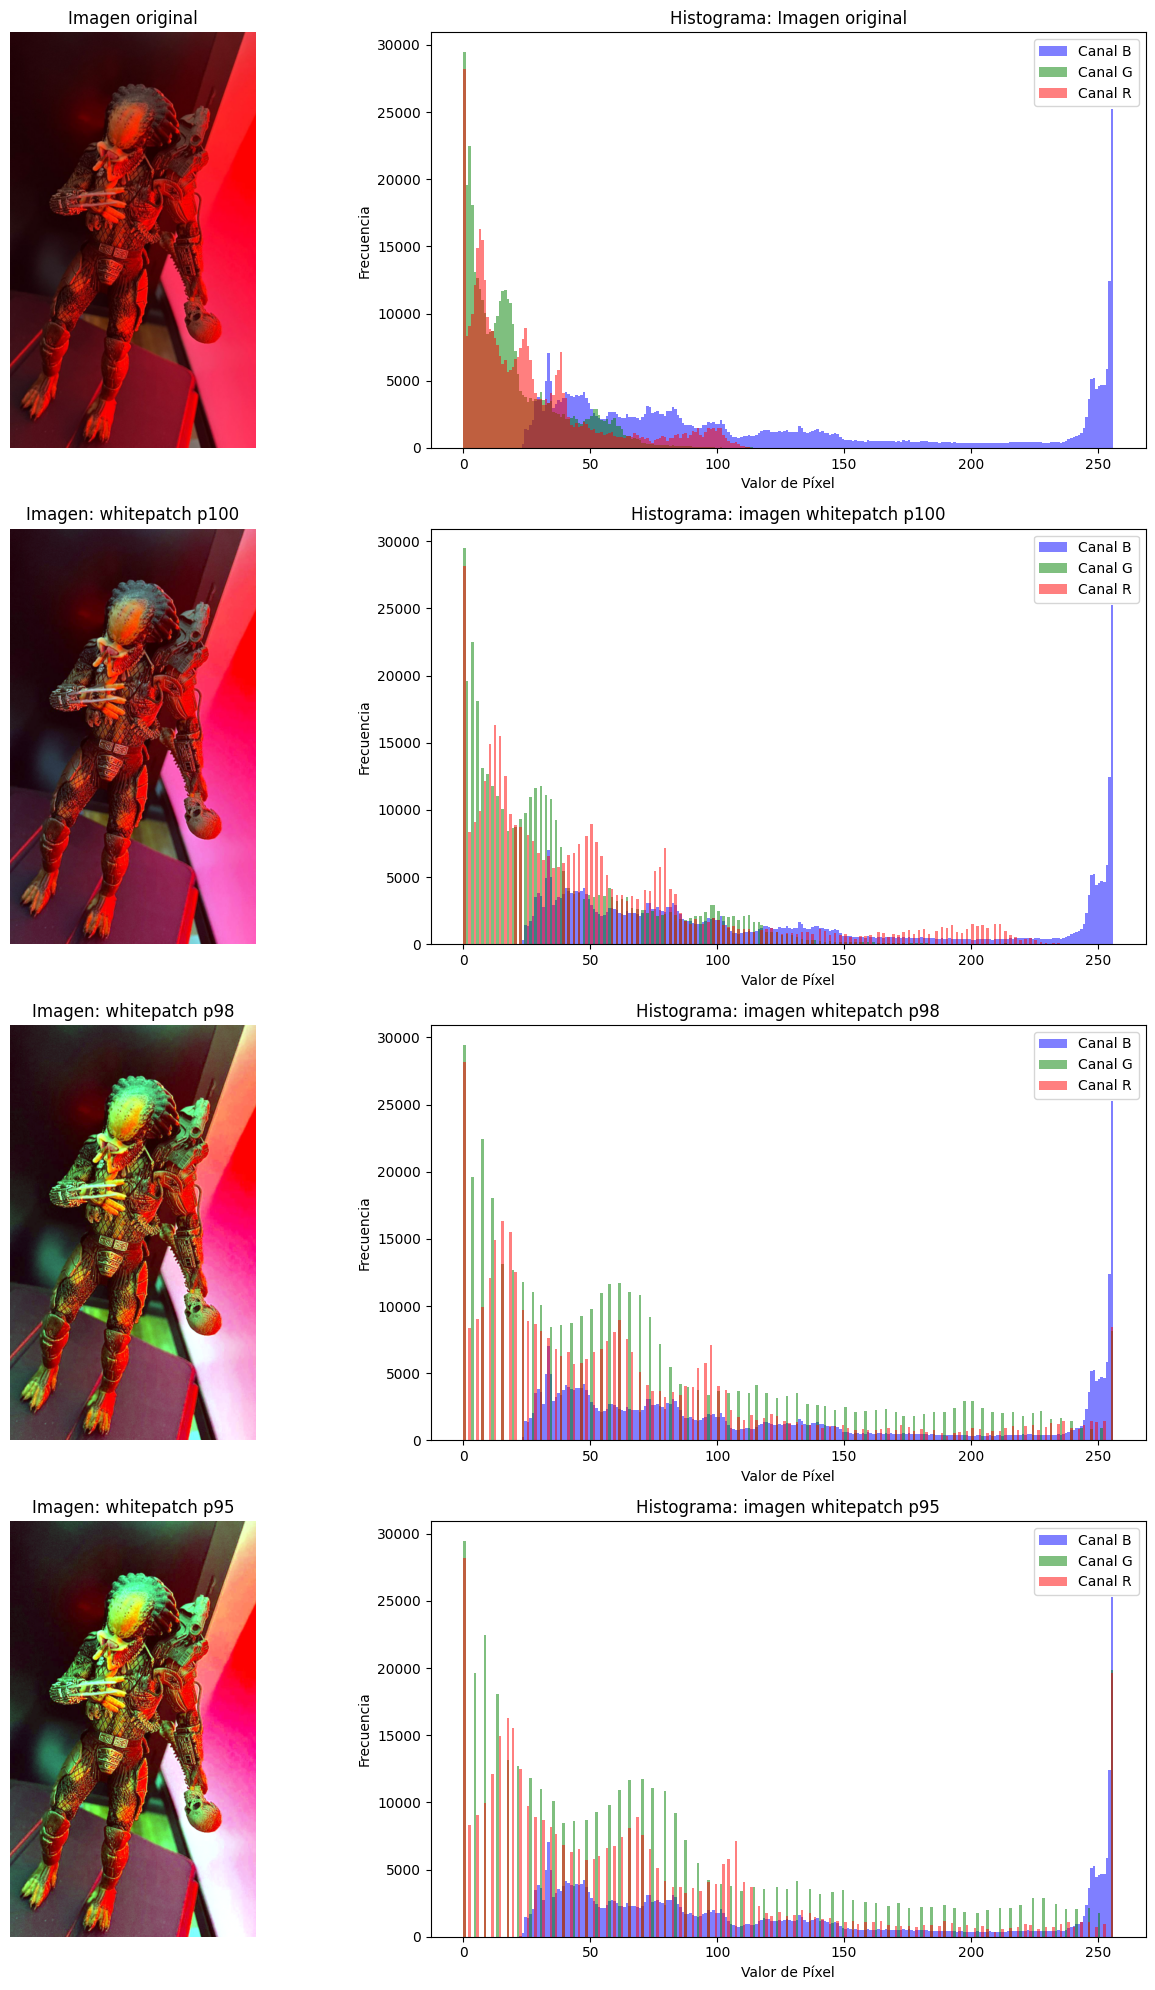

In [114]:
procesarMuestra('white_patch/wp_red.png',[100, 98, 95])

En la imagen anterior, se observa en los histogramas que los valores se concentran principalmente en la zona de sombras, por debajo de 100. Debido a este desequilibrio, los valores máximos se encuentran alejados de la media, lo que dificulta una adecuada compensación en los canales. Asimismo, el canal rojo presenta una concentración mayor en el extremo de las luces. Por ello, se opta por utilizar varios percentiles para excluir los valores atípicos y facilitar un mayor desplazamiento en la escala de valores. Podemos ver que tenemos muy buenos resultados con el percentil 98.


[255. 255. 255.]
[ 86.  69. 253.]
[ 56.  51. 252.]


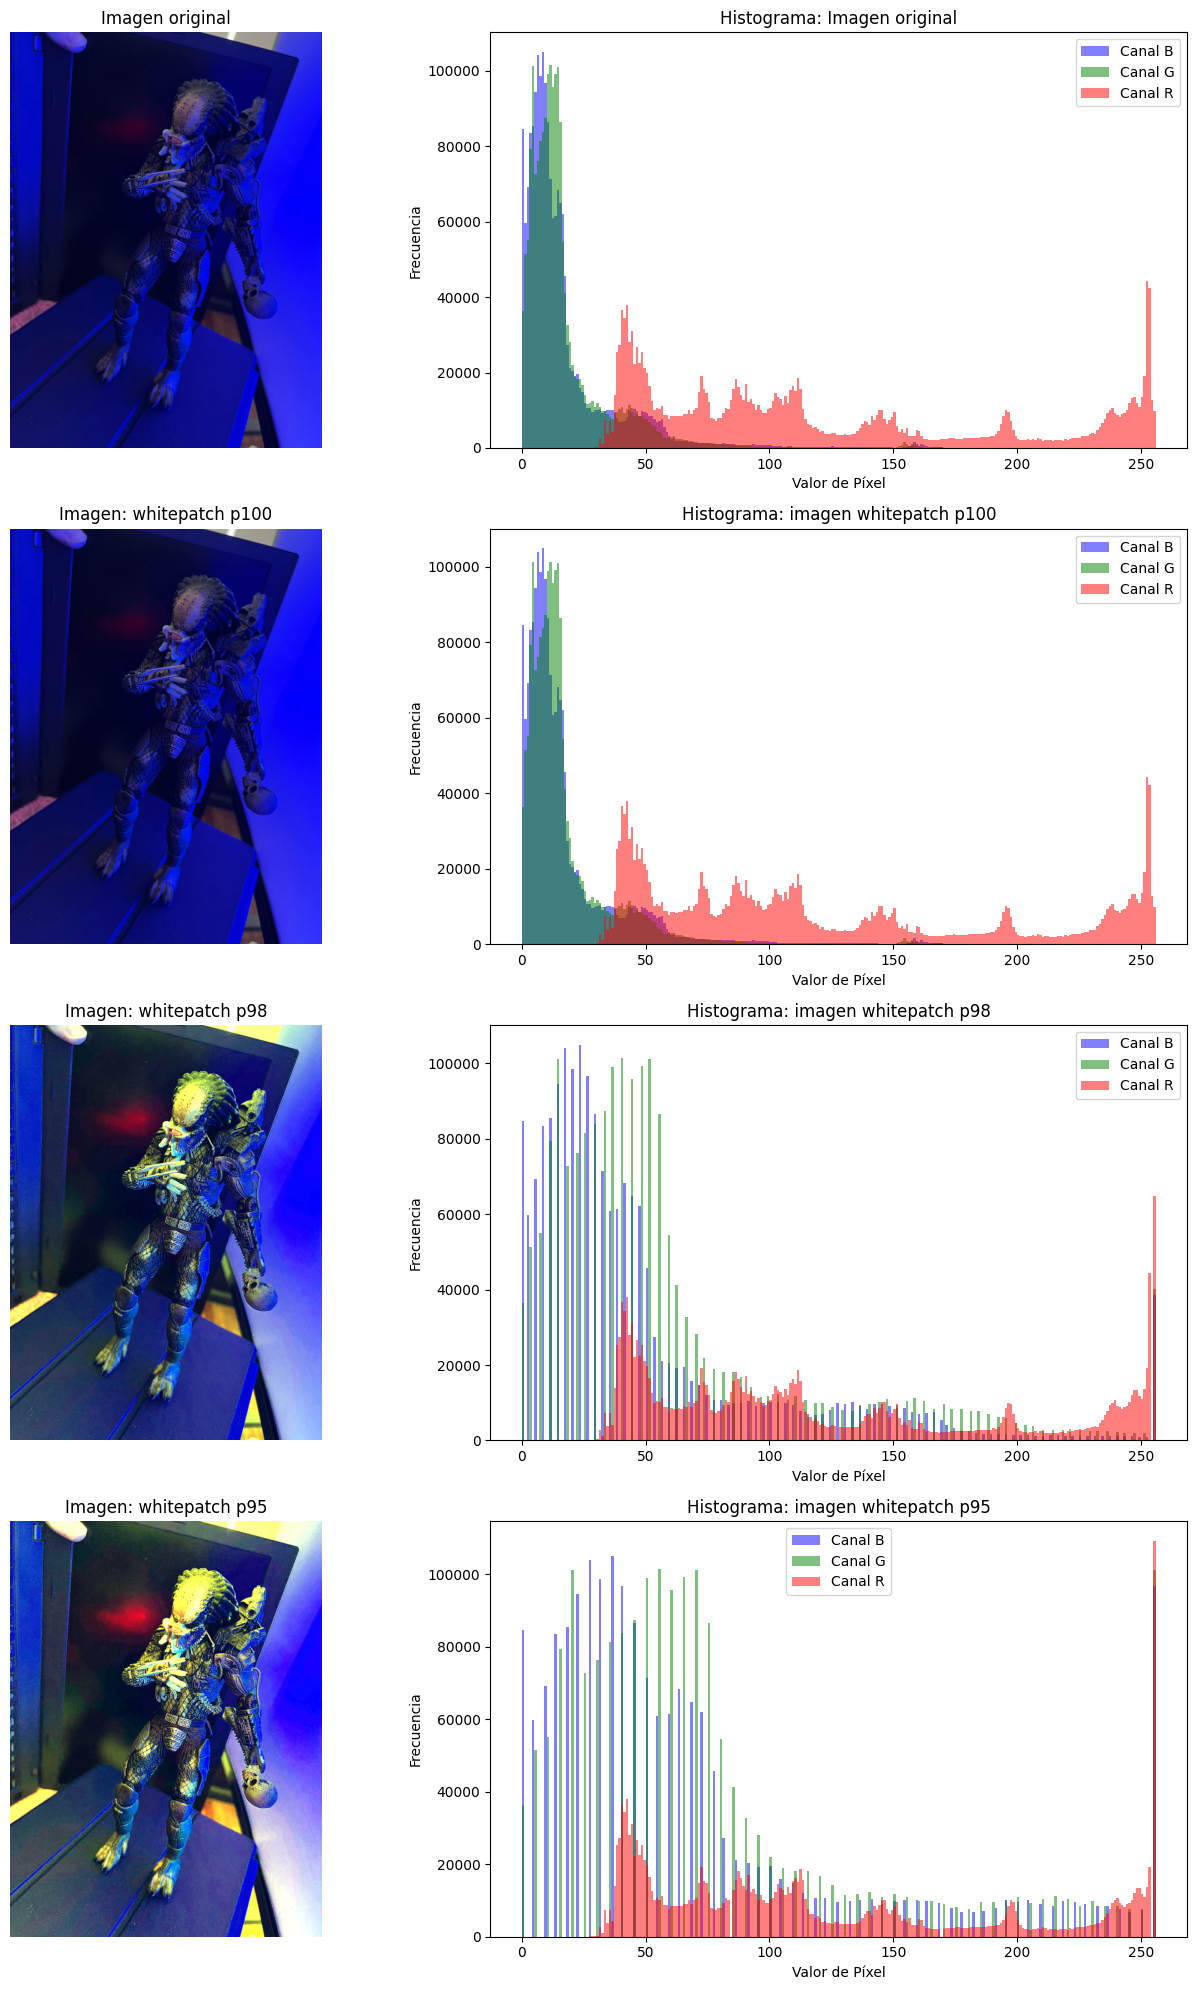

In [117]:
procesarMuestra('white_patch/wp_blue.jpg', [100, 98, 95])

En la imagen anterior, se observa en los histogramas de los caneles `B` y `G` los valores se concentran principalmente en la zona de sombras, por debajo de 50. Debido a este desequilibrio, los valores máximos se encuentran alejados de la media, lo que dificulta una adecuada compensación en los canales. Por ello, se opta por utilizar varios percentiles para excluir los valores atípicos y facilitar un mayor desplazamiento en la escala de valores. Podemos ver que tenemos muy buenos resultados con el percentil 98.

[170. 255. 172.]
[ 58. 255.  44.]
[ 30. 255.  24.]


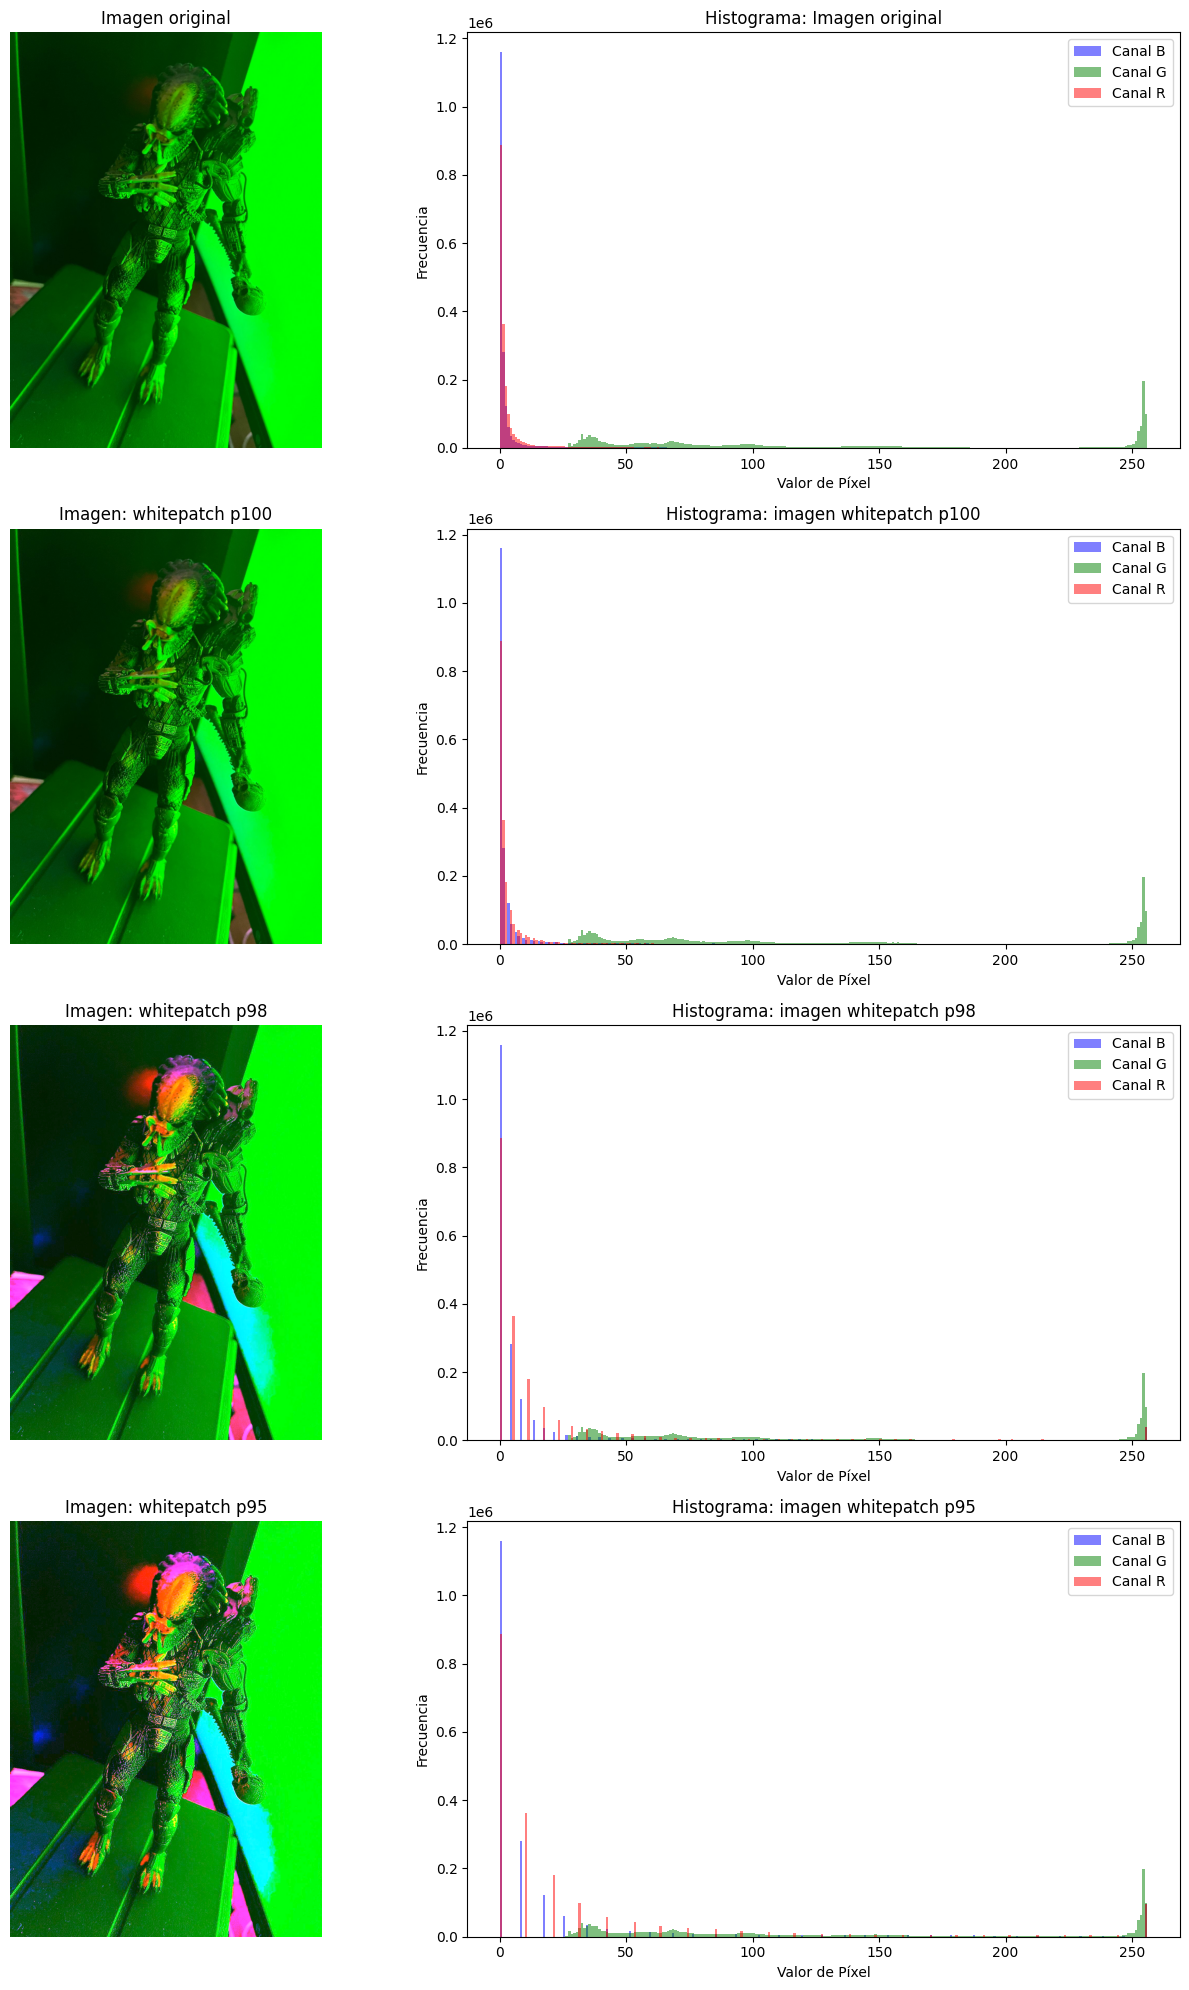

In [111]:
procesarMuestra('white_patch/wp_green2.jpg', [100, 98, 95])

Falta Agregar Descripcion   

[255. 201. 203.]
[255.  76. 101.]
[255.  60.  90.]


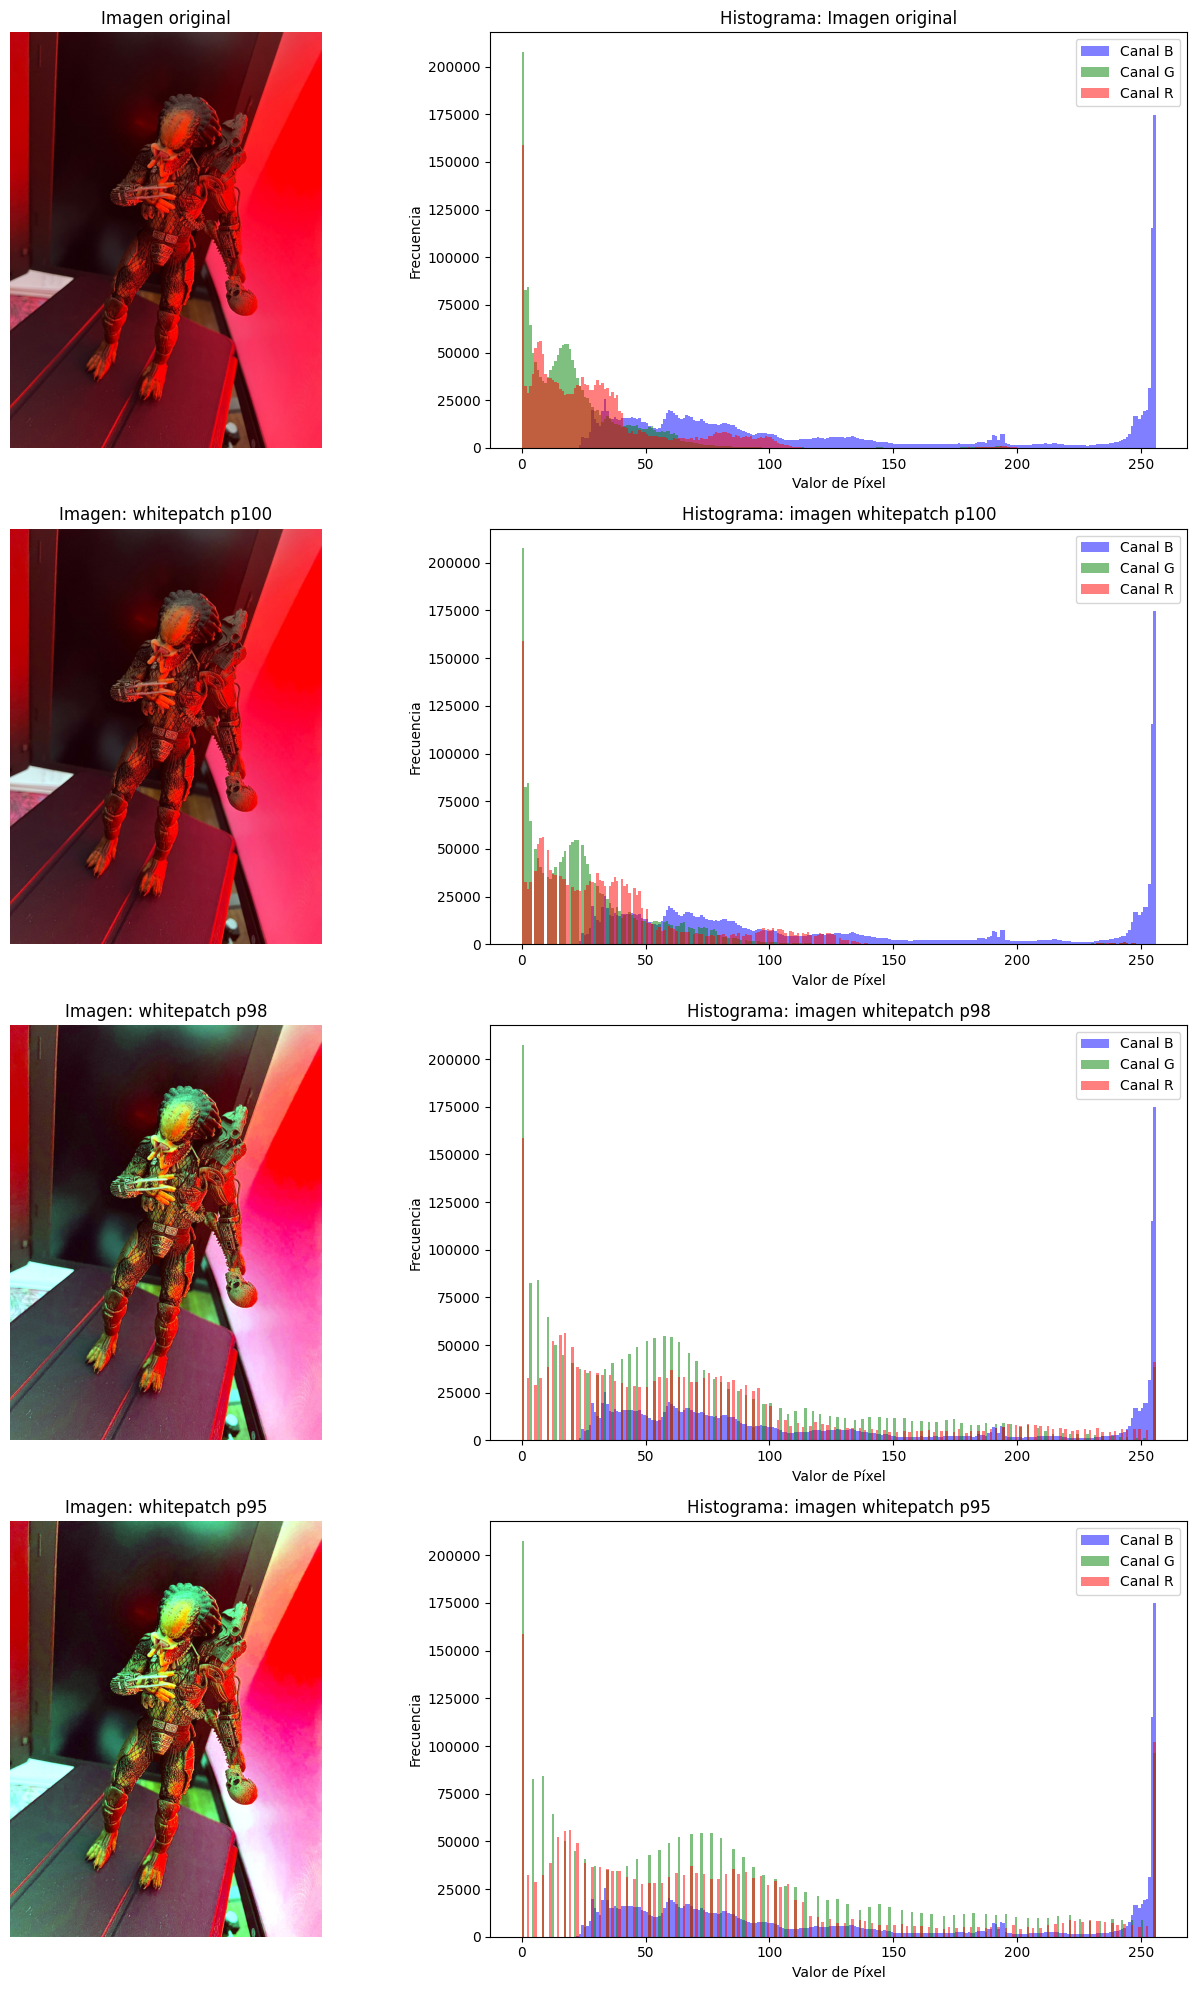

In [112]:
procesarMuestra('white_patch/wp_red2.jpg', [100, 98, 95])


Falta Agregar Descripcion